In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import os
os.chdir('D:\Studia\MoCaDR_proj1')

In [2]:
res_svd1 = pd.read_csv('Results/results_svd1_final.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()

In [4]:
a = ggplot(res_svd1_long) + \
    geom_line(aes(x='r', y='value', color='variable'))

In [5]:
a.save(filename = 'Report/fig/test.png')

d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\studia\mocadr_proj1\venv\lib\site-packages\plotnine\ggplot.py:722: PlotnineWarning: Filename: Report/fig/test.png


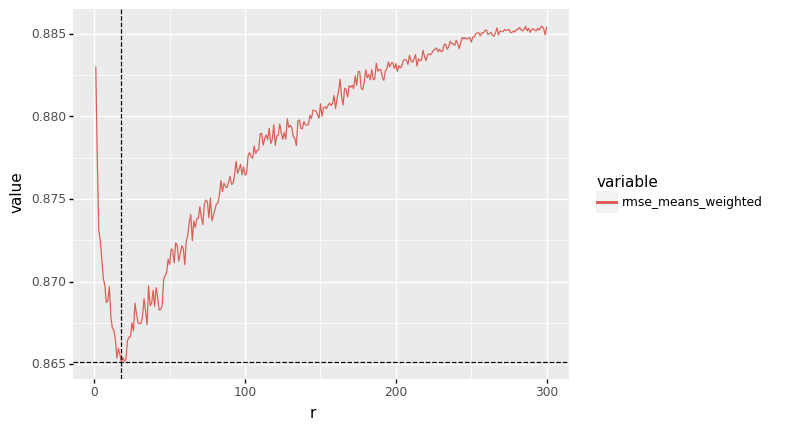

<ggplot: (132655196203)>

In [19]:
ggplot(res_svd1_long[res_svd1_long['variable'] == 'rmse_means_weighted']) + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    geom_hline(yintercept=best_rmse, linetype='dashed') + \
    geom_vline(xintercept=best_r, linetype='dashed')